In [22]:
import ee
ee.Authenticate()
ee.Initialize()

In [23]:
import ee
import folium
import time
from folium import plugins
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
import math 
from sklearn.linear_model import TheilSenRegressor
from numpy import nan
import scipy
import statsmodels.api as sm
import os, pickle
from tqdm import tqdm

In [24]:
# import LEAF modules
import LEAF
import SL2PV0 
import SL2PV1

In [39]:
# siteList = ["projects/ee-modis250/assets/validationGBOV/COPERNICUS_GBOV_RM7_20220616174529",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_HayRiverv3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_Labradorv3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_MerBleuv3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_MtPolleyv3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_PeaceRiverv3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_TurkeyPointv3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_VancouverIslandv3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2019_Yellowknifev3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3",\
#              "projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2021_NovaScotiav3"]


siteList = ["projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3"]

In [40]:
sites_North_America = ['Barrow','BartlettExperimentalForest','BlandyExperimentalFarm','Bondville','Boulder','CentralPlainsExperimentalRange','DeadLake','DesertRock','DesMoines','DisneyWildernessPreserve','DukeForest', \
                        'FortPeck','GoodwinCreek','GuanicaForest','HarvardForest','ImnavaitCreek','JonesEcologicalResearchCenter','Jornada','KonazPrairieBiologicalStation','LajasExperimentalStation','Manhattan','Moab', \
                       'NiwotRidgeForest','NiwotRidgeMountainResearchStation','NorthSterling','OakRidge','OnaquiAult','OrdwaySwisherBiologicalStation','RockSprings','SantaBarbara','SantaRita','SiouxFallsSurfRad',\
                       'SiousFallsUscrn','SmithsonianConservationBiologyInstitute','SmithsonianEnvironmentalResearchCenter','SouthernGreatPlains','StiegerwaldtLandServices','TableMountan',\
                       'TalladegaNationalForest','TonziRanch','Underc','WalnutGulchKendall','Williams','Woodworth','YosemiteVillage', \
                        'Geraldton2020', 'HayRiver2019' ,'Labrador2019' ,'Merbleue2019','MtPolley2019','PeaceRiver2019' ,'TurkeyPoint2019' ,'VancouverIsland2019','YellowKnife2019', 'NovaScotia2021']
treed_IGBP_class = ['Evergreen Broadleaf', 'Evergreen Needleleaf', 'Mixed Forest','Deciduous Broadleaf','Closed Shrublands','Open Shrublands']

In [41]:
# datapath='C:/Djamai_Najib/1_vegetation_parameters/1_scripts/LEAF-Landsat-Validation-paper/data/COPERNICUS_GBOV_LS8_SL2PV0_spatialbuffer_45/'
datapath='./data/COPERNICUS_GBOV_LS8_SL2PV0_spatialbuffer_test/'

## Run LEAF

##### LAI from SL2P/LANDSAT-8

In [28]:
sitesDictionaryL08LAI = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 45,\
                                                bufferTemporalSize =[-10,10],  \
                                                subsamplingFraction = 0.99,\
                                                outputFileName=datapath,\
                                                feature_range=[0,1000])

STARTING LEAF IMAGE for  LANDSAT/LC08/C02/T1_L2
Output path: ./data/COPERNICUS_GBOV_LS8_SL2PV0_spatialbuffer_test/CCRSInSituLAI2020_RingOfFirev3_LAI_0_1000_2024_02_02_14h_02mn_00s.pkl
Site:  projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3  with  58  features.
Data sampeling for features: from 0 to 58
0eature n°: 0/58  -- startDate: 2020-07-10 20:00:00 -- endDate: 2020-07-30 20:00:00
projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3
1eature n°: 1/58  -- startDate: 2020-07-10 20:00:00 -- endDate: 2020-07-30 20:00:00
projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3
2eature n°: 2/58  -- startDate: 2020-07-10 20:00:00 -- endDate: 2020-07-30 20:00:00
projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3
3eature n°: 3/58  -- startDate: 2020-07-10 20:00:00 -- endDate: 2020-07-30 20:00:00
projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3
4eature n°: 4/58  -- startDate: 2020-07-

##### fCOVER from SL2P/LANDSAT-8

In [7]:
# siteList [0] = ["projects/ee-modis250/assets/validationGBOV/COPERNICUS_GBOV_RM4_20220616174529"]
# sitesDictionaryL08FCOVER = LEAF.sampleSites(siteList, \
#                                                 imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
#                                                 algorithm=SL2PV0, 
#                                                 variableName="fCOVER",\
#                                                 maxCloudcover=90,\
#                                                 outputScaleSize=30,\
#                                                 inputScaleSize=30,\
#                                                 bufferSpatialSize = 45,\
#                                                 bufferTemporalSize =[-10,10],  \
#                                                 subsamplingFraction = 0.99,\
#                                                 outputFileName=datapath,\
#                                                 feature_range=[0,1000])

##### fAPAR from SL2P/LANDSAT-8

In [24]:
# siteList [0] = ["projects/ee-modis250/assets/validationGBOV/COPERNICUS_GBOV_RM6_20220616174529"]
# sitesDictionaryL08FAPAR = LEAF.sampleSites(siteList, \
#                                                 imageCollectionName='COPERNICUS/S2_SR_HARMONIZED',\
#                                                 algorithm=SL2PV0, 
#                                                 variableName="fAPAR",\
#                                                 maxCloudcover=90,\
#                                                 outputScaleSize=30,\
#                                                 inputScaleSize=30,\
#                                                 bufferSpatialSize = 30,\
#                                                 bufferTemporalSize =[-10,10],  \
#                                                 subsamplingFraction = 0.99,\
#                                                 outputFileName=datapath,\
#                                                 feature_range=[0,1000])

### Browse input data (.pkl files)

In [42]:
# parameters for validation figures and  statistics 
sampleLAIFileName    = os.path.join(datapath,[ff for ff in os.listdir(datapath) if ff.endswith('.pkl') and 'LAI' in ff][0])
#samplefCOVERFileName = os.path.join(datapath,[ff for ff in os.listdir(datapath) if ff.endswith('.pkl') and 'fCOVER' in ff][0])
#samplefAPARFileName  = os.path.join(datapath,[ff for ff in os.listdir(datapath) if ff.endswith('.pkl') and 'fAPAR' in ff][0])

print('sampleLAIFileName: '+sampleLAIFileName)
#print('samplefCOVERFileName: '+samplefCOVERFileName)
#print('samplefAPARFileName: '+samplefAPARFileName)


sampleLAIFileName: ./data/COPERNICUS_GBOV_LS8_SL2PV0_spatialbuffer_test/CCRSInSituLAI2020_RingOfFirev3_LAI_0_1000_2024_02_02_14h_02mn_00s.pkl


In [43]:
# renames columns of in-situ validation samples to standard names
def renameColumns(siteDF) :
    if 'GBOV' in os.path.split(os.path.abspath(siteDF.name))[-1]:   
        siteDF['network'] = 'GBOV'
        newNames = {'Site': 'Site', \
                        'FCOVER_down': 'fCOVER_down', \
                        'FCOVER_up': 'fCOVER_up', \
                        'FCOVER_down_err': 'fCOVER_down_err', \
                        'FCOVER_up_err': 'fCOVER_up_err', \
                        'FIPAR_down': 'fAPAR_down', \
                        'FIPAR_up': 'fAPAR_up', \
                        'FIPAR_down_err': 'fAPAR_down_err', \
                        'FIPAR_up_err': 'fAPAR_up_err', \
                        'LAI_Warren_up': 'PAI_up', \
                        'LAI_Warren_down': 'PAI_down', \
                        'LAIe_Warren_up': 'PAIe_up', \
                        'LAIe_Warren_down': 'PAIe_down', \
                        'LAIe_Miller_up': 'PAIe_Miller_up', \
                        'LAIe_Miller_down': 'PAIe_Miller_down', \
                        'LAI_Warren_up_err': 'PAI_up_err', \
                        'LAI_Warren_down_err': 'PAI_down_err', \
                        'LAIe_Warren_up_err': 'PAIe_up_err', \
                        'LAIe_Warren_down_err': 'PAIe_down_err', \
                        'LAIe_Miller_up_err': 'PAIe_Miller_up_err', \
                        'LAIe_Miller_down_err': 'PAIe_Miller_down_err'} 
    elif 'CCRS' in os.path.split(os.path.abspath(siteDF.name))[-1]:
        siteDF['network'] = 'CCRS'
        siteDF['IGBP_class'] = 'Mixed Forest'
        siteDF.loc[siteDF['BF']>0.75,'IGBP_class'] = 'Deciduous Broadleaf'
        siteDF.loc[siteDF['BF']<0.25,'IGBP_class'] = 'Evergreen Needleleaf'
        newNames = {'Location': 'Site', \
                    'BF' : 'fBroadleaf' , \
                    'NF': 'fNeedleafleaf' , \
                    'fcover_Down': 'fCOVER_down', \
                    'fcover_Up': 'fCOVER_up', \
                    'fcoverstd_Down': 'fCOVER_down_err', \
                    'fcoverstd_Up': 'fCOVER_up_err', \
                    'Daily_Integrated_Black_Sk_yfAPAR_Down': 'fAPAR_down', \
                    'Daily_Integrated_Black_Sk_yfAPAR_Up': 'fAPAR_up' , \
                    'Daily_Integrated_Black_Sky_fAPAR_Down': 'fAPAR_down', \
                    'Daily_Integrated_Black_Sky_fAPAR_Up': 'fAPAR_up' , \
                    'PAICEV61_Up': 'PAI_up', \
                    'PAICEV61_Down': 'PAI_down', \
                    'PAIeCEV61_Up': 'PAIe_up', \
                    'PAIeCEV61_Down':'PAIe_down', \
                    'PAIEMiller_Up': 'PAIe_Miller_up', \
                    'PAIEMiller_Down':'PAIe_Miller_down', \
                    'Woody_Fraction_average':'WAItoPAIratio', \
                    'Woody_Fraction_std': 'WAItoPAIratio_std' }  

    elif 'NEON' in os.path.split(os.path.abspath(siteDF.name))[-1]:
        siteDF['network'] = 'NEON'
        newNames = {'SITE': 'Site', \
                    'PLOT_ID':'PlotID',\
                    'nlcd':'NLCD_class',\
                    'clumping_index_Miller_understoryest' : 'clumping_Miller_down' , \
                    'clumping_index_Miller_understoryerror': 'clumping_Miller_down_err' , \
                    'clumping_index_Miller_overstoryest': 'clumping_Miller_up', \
                    'clumping_index_Miller_overstoryerror': 'clumping_Miller_up_err', \
                    'clumping_index_Warren_understoryest': 'clumping_Warren_down', \
                    'clumping_index_Warren_understoryerror': 'clumping_Warren_down_err', \
                    'clumping_index_Warren_overstoryest': 'clumping_Warren_up', \
                    'clumping_index_Warren_overstoryerror': 'clumping_Warren_up_err' , \
                    'datetime': 'Date', \
                    'understory_flag': 'down_flag' , \
                    'FIPAR_understoryest': 'fAPAR_down', \
                    'FIPAR_understoryerror': 'fAPAR_down_err', \
                    'FIPAR_overstoryest': 'fAPAR_up', \
                    'FIPAR_overstoryerror':'fAPAR_up_err', \
                    'FCOVER_understoryest': 'fCOVER_down', \
                    'FCOVER_understoryerror':'fCOVER_down_err', \
                    'FCOVER_overstoryest':'fCOVER_up', \
                    'FCOVER_overstoryerror': 'fCOVER_up_err', \
                    
                    'true_LAI_Miller_understoryest':'PAI_Miller_down', \
                    'true_LAI_Miller_understoryerror':'PAI_Miller_down_err', \
                    'true_LAI_Miller_overstoryest':'PAI_Miller_up', \
                    'true_LAI_Miller_overstoryerror':'PAI_Miller_up_err', \
                    'true_LAI_Warren_understoryest':'PAI_Warren_down', \
                    'true_LAI_Warren_understoryerror':'PAI_Warren_down_err', \
                    'true_LAI_Warren_overstoryest':'PAI_Warren_up', \
                    'true_LAI_Warren_overstoryerror':'PAI_Warren_up_err', \
                    
                    'effective_LAI_Miller_understoryest':'PAIe_down', \
                    'effective_LAI_Miller_understoryerror':'PAIe_down_err', \
                    'effective_LAI_Miller_overstoryest':'PAIe_up', \
                    'effective_LAI_Miller_overstoryerror':'PAIe_up_err', \
                    'effective_LAI_Warren_understoryest':'PAIe_Warren_down', \
                    'effective_LAI_Warren_understoryerror':'PAIe_Warren_down_err', \
                    'effective_LAI_Warren_overstoryest':'PAIe_Warren_up', \
                    'effective_LAI_Warren_overstoryerror':'PAIe_Warren_up_err', \
                    'PLOT_ID':'PLOT_ID', \
                    'timeStart':'timeStart', \
                    'overstory_flag':'up_flag', \
                    'combined_flag':'combined_flag'}
                    
    return  siteDF.rename(columns = newNames)

In [44]:
# defined overstory woody to total plant are ratio based on land cover 
def estimateWAItoPAIratio(samplesDF) :
    #estimate overstory woody to total area ratio for GBOV sites
    # use initial fixed ratio for all sites based on shrubs
    samplesDF.loc[(samplesDF['network'] == 'GBOV') ,'WAItoPAIratio'] = 0.10
    samplesDF.loc[(samplesDF['network'] == 'GBOV') ,'WAItoPAIratio_std'] = 0.11

    # use fixed ratio for needeleaf sites
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Evergreen Needleleaf'),'WAItoPAIratio'] = 0.16
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Evergreen Needleleaf'),'WAItoPAIratio_std'] = 0.10   
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Deciduous Needleleaf'),'WAItoPAIratio'] = 0.16
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Deciduous Needleleaf'),'WAItoPAIratio_std'] = 0.10  

    # use fixed ratio for  broadleaf sites
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Evergreen Broadleaf'),'WAItoPAIratio'] = 0.24
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Evergreen Broadleaf'),'WAItoPAIratio_std'] = 0.11
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Deciduous Broadleaf'),'WAItoPAIratio'] = 0.24
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Deciduous Broadleaf'),'WAItoPAIratio_std'] = 0.11

    # use fixed ratio for mixed forest
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Mixed Forest'),'WAItoPAIratio'] = 0.18
    samplesDF.loc[(samplesDF['network'] == 'GBOV') & (samplesDF['IGBP_class'] == 'Mixed Forest'),'WAItoPAIratio_std'] = 0.11

    # fix some transcription errors in WAI to PAI ratio for CCRS
    samplesDF['WAItoPAIratio'] = samplesDF['WAItoPAIratio'].clip(lower=0.1,upper=0.24)
    samplesDF['WAItoPAIratio_std'] = samplesDF['WAItoPAIratio_std'].clip(lower=0.1,upper=0.11)
    return (samplesDF)

In [45]:
def format_features(feat,variablename):
    D=dict()
    for key in feat.keys():
        cols=list(feat[key][0].keys())
        A=[feat[key][ii][cols[0]] for ii in range(len(feat[key]))]
        B=[feat[key][ii][cols[1]] for ii in range(len(feat[key]))]
        for ii in range(len(feat[key])):
            A[ii]['sample%s'%(variablename)]=B[ii]
        D.update({key:A}) 
    return D

In [46]:
def rename_nlcd_class (samplesDF) :
    if 'NEON' in np.unique(samplesDF['network']):
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'evergreenForest')           ,'NLCD_class'] = 'Evergreen Forest'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'deciduousForest')           ,'NLCD_class'] = 'Deciduous Forest' 
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'mixedForest')               ,'NLCD_class'] = 'Mixed Forest'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'cultivatedCrops')           ,'NLCD_class'] = 'Cultivated Crops'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'pastureHay')                ,'NLCD_class'] = 'Pasture Hay' 
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'dwarfScrub')                ,'NLCD_class'] = 'Dwarf Scrub'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'shrubScrub')                ,'NLCD_class'] = 'Shrub Scrub' 
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'woodyWetlands')             ,'NLCD_class'] = 'Woody Wetlands' 
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'emergentHerbaceousWetlands'),'NLCD_class'] = 'Emergent Herbaceous Wetlands'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'sedgeHerbaceous')           ,'NLCD_class'] = 'Sedge Herbaceous'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'grasslandHerbaceous')       ,'NLCD_class'] = 'Grassland Herbaceous'
    return (samplesDF)

In [60]:
def parseSampleFile(sampleFileName,variableName):
# clumping uncertainty
    clumping_err = 0.025
    WAItoPAIdown= 0.1
    
    with open(sampleFileName, "rb") as fp:   #Pickling
        sampleDictionary = pickle.load(fp)

    sampleDictionary=format_features(sampleDictionary,variableName)
    sitesList = sampleDictionary.keys()
    samplesDF = pd.DataFrame();
    for key in sitesList:
        #convert list to pandas data frame, rename columns, filter for North America
        siteDF = pd.concat([pd.DataFrame(sampleDictionary[key]),pd.DataFrame([key] * len(sampleDictionary[key]),columns=['geeFeatureCollection'])],axis=1)
        siteDF.name = key
        siteDF = renameColumns(siteDF)
        siteDF=rename_nlcd_class(siteDF) 
        #siteDF = siteDF[siteDF['IGBP_class'].isin(treed_IGBP_class)]
        siteDF = siteDF[siteDF['Site'].isin(sites_North_America)].reset_index()
        #number of samples and number valid samples
        siteDF = siteDF.reset_index() 
        numValid = []
        numSamples = []

        for index,site in siteDF.iterrows():
            if not site['sample'+variableName].empty:
                siteQC = site['sample'+variableName]['QC'].values
            else: 
                siteQC=[]
            numSamples.append(len(siteQC))
            numValid.append(len(siteQC) - np.count_nonzero(siteQC))
        numSamplesDF= pd.DataFrame(numSamples,columns=['numSamples'])
        numValidDF = pd.DataFrame(numValid,columns=['numValid'])
        siteDF = pd.concat([siteDF,numSamplesDF, numValidDF],axis=1)
        samplesDF = pd.concat([samplesDF,siteDF],axis=0,ignore_index=True)
    samplesDF = samplesDF.reset_index(drop=True)

    if variableName == 'LAI' :
        # print(list(samplesDF.columns))
        print([ff for ff in list(samplesDF.columns) if ff.startswith('PAI')])
        # samplesDF = estimateWAItoPAIratio(samplesDF)
        #-------------correct some wrong values
        auxDF=samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']]
        auxDF=correct_cell_values(auxDF)
        samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']]=auxDF
        #--------------------------------------------------    
        # samplesDF.loc[[1153],['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']]=0
        # samplesDF.loc[[1821],['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']]=0
        
        #samplesDF.loc[[730],'fCOVER_down_err']=0
        samplesDF[['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']] = samplesDF[['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']].apply(pd.to_numeric)
        samplesDF[['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']] = samplesDF[['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']].replace(-999, 0)

        # gap fill estimates of insitu error for CCRS
        samplesDF.loc[samplesDF['network'] == 'CCRS','PAIe_up_err'] = samplesDF.loc[samplesDF['network'] == 'CCRS','PAIe_up'].mul(0.04830027).add(0.002163865830433743)
        samplesDF.loc[samplesDF['network'] == 'CCRS','PAIe_down_err'] = samplesDF.loc[samplesDF['network'] == 'CCRS','PAIe_down'].mul(0.04830027).add(0.002163865830433743)        
        samplesDF.loc[samplesDF['network'] == 'CCRS','PAI_up_err'] = samplesDF.loc[samplesDF['network'] == 'CCRS','PAI_up'].mul(0.04480655).add(0.010224858872736227)
        samplesDF.loc[samplesDF['network'] == 'CCRS','PAI_down_err'] = samplesDF.loc[samplesDF['network'] == 'CCRS','PAI_down'].mul(0.04480655).add(0.010224858872736227)

        samplesDF['percentValid'] = samplesDF['numValid'].div(samplesDF['numSamples'])
        
        # add error due to uncertainty in clumping
        samplesDF['PAI_up_err_clumping'] = samplesDF['PAI_up'].mul(samplesDF['PAI_up'].div((samplesDF['PAIe_up']).add(0.0001)).mul(clumping_err))
        samplesDF['PAI_up_err'] = samplesDF['PAI_up_err'].pow(2).add(samplesDF['PAI_up_err_clumping'].pow(2)).pow(0.5)
        samplesDF['PAI_down_err_clumping'] = samplesDF['PAI_down'].mul(samplesDF['PAI_down'].div((samplesDF['PAIe_down']).add(0.0001)).mul(clumping_err))
        samplesDF['PAI_down_err'] = samplesDF['PAI_down_err'].pow(2).add(samplesDF['PAI_down_err_clumping'].pow(2)).pow(0.5)

        #compute total canopy values including woody area
        samplesDF['PAI_total'] = samplesDF['PAI_up'].add(samplesDF['PAI_down']) 
        samplesDF['PAI_total_err'] = samplesDF['PAI_up_err'].pow(2).add(samplesDF['PAI_down_err'].pow(2)).pow(0.5)
        samplesDF['PAIe_total'] = samplesDF['PAIe_up'].add(samplesDF['PAIe_down']) 
        samplesDF['PAIe_total_err'] = samplesDF['PAIe_up_err'].pow(2).add(samplesDF['PAIe_down_err'].pow(2)).pow(0.5)
        samplesDF['clumping_total'] = samplesDF['PAIe_total'].div(samplesDF['PAI_total'] ) 
        samplesDF['clumping_total_err']  = (2 * clumping_err  * clumping_err) ** (0.5)          
         #compute total canopy values depending to removing woddy area
        samplesDF = estimateWAItoPAIratio(samplesDF)
        samplesDF['LAI_up'] = samplesDF['PAI_up'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['LAI_up_err'] = samplesDF['PAI_up_err'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['LAI_down'] = samplesDF['PAI_down'] * ( 1 - WAItoPAIdown)
        samplesDF['LAI_down_err'] = samplesDF['PAI_down_err'] * ( 1 - WAItoPAIdown)
        samplesDF['LAI_total'] = samplesDF['LAI_up'] + samplesDF['LAI_down']
        samplesDF['LAI_total_err'] = samplesDF['LAI_down_err'].pow(2).add(samplesDF['LAI_up_err'].pow(2)).pow(0.5)                                                                           
        samplesDF['LAIe_up'] = samplesDF['PAIe_up'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['LAIe_up_err'] = samplesDF['PAIe_up_err'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['LAIe_down'] = samplesDF['PAIe_down'] * ( 1 - WAItoPAIdown)
        samplesDF['LAIe_down_err'] = samplesDF['PAIe_down_err'] * ( 1 - WAItoPAIdown)
        samplesDF['LAIe_total'] = samplesDF['LAIe_up'] + samplesDF['LAIe_down']
        samplesDF['LAIe_total_err'] = samplesDF['LAIe_down_err'].pow(2).add(samplesDF['LAIe_up_err'].pow(2)).add(samplesDF['LAI_up'].mul(samplesDF['LAI_up'].mul(samplesDF['WAItoPAIratio_std'])).pow(2)).pow(0.5)                                                             
    elif variableName == 'fCOVER' :
        samplesDF = estimateWAItoPAIratio(samplesDF)
        samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']] = samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']].apply(pd.to_numeric)
        samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']] = samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']].replace(-999, 0)
        samplesDF['percentValid'] = samplesDF['numValid'] / samplesDF['numSamples']
        samplesDF['fCOVER_up'] = samplesDF['fCOVER_up'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['fCOVER_down'] = samplesDF['fCOVER_down'] * ( 1 - WAItoPAIdown)
        samplesDF['fCOVER_total'] = samplesDF['fCOVER_up'].add((samplesDF['fCOVER_up'].mul(-1).add(1)).mul(samplesDF['fCOVER_down'] ))
        samplesDF['fCOVER_total_err'] = samplesDF['fCOVER_down_err'].pow(2).add(samplesDF['fCOVER_up_err'].pow(2)).add(samplesDF['fCOVER_up'].mul(samplesDF['fCOVER_up'].mul(samplesDF['WAItoPAIratio_std'])).pow(2)).pow(0.5)  
    elif  variableName == 'fAPAR' :
        samplesDF = estimateWAItoPAIratio(samplesDF)
        print(list(samplesDF.columns))
        samplesDF[['fAPAR_up','fAPAR_down','fAPAR_up_err','fAPAR_down_err']] = samplesDF[['fAPAR_up','fAPAR_down','fAPAR_up_err','fAPAR_down_err']].apply(pd.to_numeric)
        samplesDF[['fAPAR_up','fAPAR_down','fAPAR_up_err','fAPAR_down_err']] = samplesDF[['fAPAR_up','fAPAR_down','fAPAR_up_err','fAPAR_down_err']].replace(-999, 0)
        samplesDF['fAPAR_up'] = samplesDF['fAPAR_up'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['fAPAR_down'] = samplesDF['fAPAR_down'] * ( 1 - WAItoPAIdown)
        samplesDF['percentValid'] = samplesDF['numValid'] / samplesDF['numSamples']
        samplesDF['fAPAR_total'] = samplesDF['fAPAR_up'].add((samplesDF['fAPAR_up'].mul(-1).add(1)).mul(samplesDF['fAPAR_down'] ))
        # gap fill estimates of insitu error for CCRS
        samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_up_err'] = samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_up'].add(-0.5).abs().mul(-0.08437372).add(0.04791396358018562).mul(samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_up']).div(samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_total'])
        samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_down_err'] = samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_down'].add(-0.5).abs().mul(-0.08437372).add(0.04791396358018562).mul(samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_down']).div(samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_total'])
        samplesDF['fAPAR_total_err'] = samplesDF['fAPAR_down_err'].pow(2).add(samplesDF['fAPAR_up_err'].pow(2)).add(samplesDF['fAPAR_up'].mul(samplesDF['fAPAR_up'].mul(samplesDF['WAItoPAIratio_std'])).pow(2)).pow(0.5)  
    else :
        print('variable not found')
              
    return(samplesDF)
        
        


In [54]:
def correct_cell_values(auxDF):
    nans=auxDF.isnull()
    auxDF=auxDF.astype(str)
    for col in auxDF.columns:
        idx=auxDF[col].str.find('E')
        idx=idx[idx>=1].index
        idx2=auxDF[col].str.find('e')
        idx2=idx2[idx2>=1].index
        for ii in idx:
            base, power =(auxDF.loc[ii][col]).split('E')
            if power=='':
                power='1'
            auxDF.loc[ii,col]=float(base)*(10**float(power))
        for ii in idx2:
            base, power =(auxDF.loc[ii][col]).split('e')
            if power=='':
                power='1'
            auxDF.loc[ii,col]=float(base)*(10**float(power))
        #correct values with 2 . (e.g 0.542.54)  
        idx=auxDF[col].str.count(".")
        for ii in idx[idx>1].index:
            s=auxDF.loc[ii,col].split('.')
            auxDF.loc[ii,col]= s=s[0]+'.'+''.join(s[1:])
 
    auxDF[nans]=np.nan
    auxDF=auxDF.astype(float) 
    return auxDF

In [48]:
def summaryStats(samplesDF,samplesLAIDF,xvariable,yvariable,trimquantile,minPAI):
    estimateMedian = [] 
    estimateSTD = [] 
    medianError = [] 
    estimateCount = [] 
    samplesDF = samplesDF.join(samplesLAIDF[samplesLAIDF.columns.difference(samplesDF.columns)])

    for index, sample in samplesDF.iterrows():
        reference = sample[yvariable]
        if not sample['sample'+xvariable].empty: 
            qc = sample['sample'+xvariable]['QC']
            estimate = sample['sample'+xvariable]['estimate'+xvariable]
            error = sample['sample'+xvariable]['error'+xvariable]
        else:
            # qc = pd.Series()
            # estimate = pd.Series()
            # error = pd.Series()
            qc = pd.Series(dtype='float64')  ### add dtype='float64'
            estimate = pd.Series(dtype='float64')  ### dtype='float64'
            error = pd.Series(dtype='float64') ### dtype='float64'
         
        productDF = pd.DataFrame(list(zip(qc,estimate,error)),columns=['qc','estimate','error'])
        productDF = productDF.loc[productDF['qc']==0]
        
        if productDF.shape[0]>0 :
            productDF['absresidual'] = (productDF['estimate'] - reference).abs()
            quantileResidual = productDF['absresidual'].quantile(trimquantile/100,interpolation='nearest')
            estimateMedian.append(productDF.loc[productDF['absresidual']==quantileResidual]['estimate'].mean())
            estimateSTD.append(productDF.loc[productDF['absresidual']<=quantileResidual,['estimate']].std().divide((productDF.loc[productDF['absresidual']<=quantileResidual].shape[0]) ** (0.5)))
            medianError.append(productDF.loc[productDF['absresidual']==quantileResidual]['error'].median())
            estimateCount.append(productDF.loc[productDF['absresidual']<=quantileResidual].shape[0])
        else:
            estimateMedian.append(np.nan)
            estimateSTD.append(np.nan)
            medianError.append(np.nan)
            estimateCount.append(0)

    samplesDF[xvariable+'_'+yvariable+'_estimate'] = estimateMedian
    samplesDF[xvariable+'_'+yvariable+'_estimate_std'] = estimateSTD 
    samplesDF[xvariable+'_'+yvariable+'_err_estimate_mean'] = medianError
    samplesDF[xvariable+'_'+yvariable+'_estimate_count'] = estimateCount
    return(samplesDF)

In [49]:
# plots accuracy precision and uncertainty curves based on residuals by fitting a polynomial of specified degree
def plotSummaryStats(x,y,err,axis,degree):
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree = degree)
    xp = poly.fit_transform(x.reshape(-1,1))
    accSummary = sm.WLS(y, xp, err ** (-2)).fit().get_prediction(xp) .summary_frame(alpha=0.05)
    pre = abs(y-np.array(accSummary['mean']))
    preSummary = sm.WLS(pre, xp, err ** (-2)).fit().get_prediction(xp) .summary_frame(alpha=0.05)
    unc = abs(y)
    # print(sm.WLS(y, xp, err ** (-2)).fit().summary())
    # print(sm.WLS(pre, xp, err ** (-2)).fit().summary())

    uncSummary = sm.WLS(unc, xp, err ** (-2)).fit().get_prediction(xp) .summary_frame(alpha=0.05)
    axis.plot(x, accSummary['mean'], color='darkgreen', label='Accuracy')
    axis.plot(x, accSummary['mean_ci_upper'], color='darkgreen',linewidth=0.5,linestyle='--')
    axis.plot(x, accSummary['mean_ci_lower'],color='darkgreen',linewidth=0.5,linestyle='--')
    axis.plot(x, preSummary['mean'], color='darkorange', label='Precision')
    axis.plot(x, preSummary['mean_ci_upper'], color='darkorange',linewidth=0.5,linestyle='--')
    axis.plot(x, preSummary['mean_ci_lower'],color='darkorange',linewidth=0.5,linestyle='--')
    axis.plot(x, uncSummary['mean'], color='royalblue', label='Uncertainty')
    axis.plot(x, uncSummary['mean_ci_upper'], color='royalblue',linewidth=0.5,linestyle='--')
    axis.plot(x, uncSummary['mean_ci_lower'],color='royalblue',linewidth=0.5,linestyle='--')
    
    return

In [50]:
print('start')

start


In [61]:
# get summary stats after trimming quantiles of residuals to remove outliers due to poor matching
# we get stats for each quantile from 10 to 100%
samplesList = []

for p in range(10,110,10):
    print(p)
    samplesLAIDF = summaryStats(parseSampleFile(sampleLAIFileName,'LAI'),parseSampleFile(sampleLAIFileName,'LAI'),'LAI','PAIe_total',p,0.01).reset_index(drop=True) #.drop(['fCOVER_up','fCOVER_down','fAPAR_up','fAPAR_down','fCOVER_up_std','fCOVER_down_std','fAPAR_up_std','fAPAR_down_std'],axis=1)
    #samplesfAPARDF = summaryStats(parseSampleFile(samplefAPARFileName,'fAPAR'),parseSampleFile(sampleLAIFileName,'LAI'),'fAPAR','fAPAR_total',p,0.01).reset_index(drop=True) #.drop(['fAPAR_up','fAPAR_down','fAPAR_up_std','fAPAR_down_std'],axis=1)
    #samplesfCOVERDF = summaryStats(parseSampleFile(samplefCOVERFileName,'fCOVER'),parseSampleFile(sampleLAIFileName,'LAI'),'fCOVER','fCOVER_total',p,0.01).reset_index(drop=True)

    #samplesDF = samplesfAPARDF[['fAPAR_up','fAPAR_down','fAPAR_total','fAPAR_up_err','fAPAR_down_err','fAPAR_total_err','samplefAPAR','fAPAR_fAPAR_total_estimate','fAPAR_fAPAR_total_estimate_std','fAPAR_fAPAR_total_err_estimate_mean','fAPAR_fAPAR_total_estimate_count']] \
    #            .join(samplesfCOVERDF[['fCOVER_up','fCOVER_down','fCOVER_total','fCOVER_up_err','fCOVER_down_err','fCOVER_total_err','samplefCOVER','fCOVER_fCOVER_total_estimate','fCOVER_fCOVER_total_estimate_std','fCOVER_fCOVER_total_err_estimate_mean','fCOVER_fCOVER_total_estimate_count']])
    
    #samplesDF = samplesDF.join(samplesLAIDF[samplesLAIDF.columns.difference(samplesDF.columns)])
    samplesDF=samplesLAIDF
    samplesDF = samplesDF[samplesDF['LAI_PAIe_total_estimate_count']>0]
    #samplesDF = samplesDF.dropna(subset='fAPAR_fAPAR_total_estimate')
 
    samplesList.append(samplesDF)

10
['PAICEV51_Down', 'PAICEV51_Total', 'PAICEV51_Up', 'PAI_down', 'PAICEV61_Total', 'PAI_up', 'PAIe_Miller_down', 'PAIEMiller_Total', 'PAIe_Miller_up', 'PAIeCEV51_Down', 'PAIeCEV51_Total', 'PAIeCEV51_Up', 'PAIe_down', 'PAIeCEV61_Total', 'PAIe_up', 'PAIeLAI2000(3)_Down', 'PAIeLAI2000(3)_Total', 'PAIeLAI2000(3)_Up', 'PAIeLAI2000(4)_Down', 'PAIeLAI2000(4)_Total', 'PAIeLAI2000(4)_Up', 'PAIeLAI2000(5)_Down', 'PAIeLAI2000(5)_Total', 'PAIeLAI2000(5)_Up']


KeyError: "['PAI_up_err', 'PAI_down_err', 'PAIe_up_err', 'PAIe_down_err'] not in index"

In [20]:
print (len(samplesList))

10


['Closed Shrublands' 'Croplands' 'Deciduous Broadleaf'
 'Evergreen Broadleaf' 'Evergreen Needleleaf' 'Grasslands' 'Mixed Forest'
 'Open Shrublands']


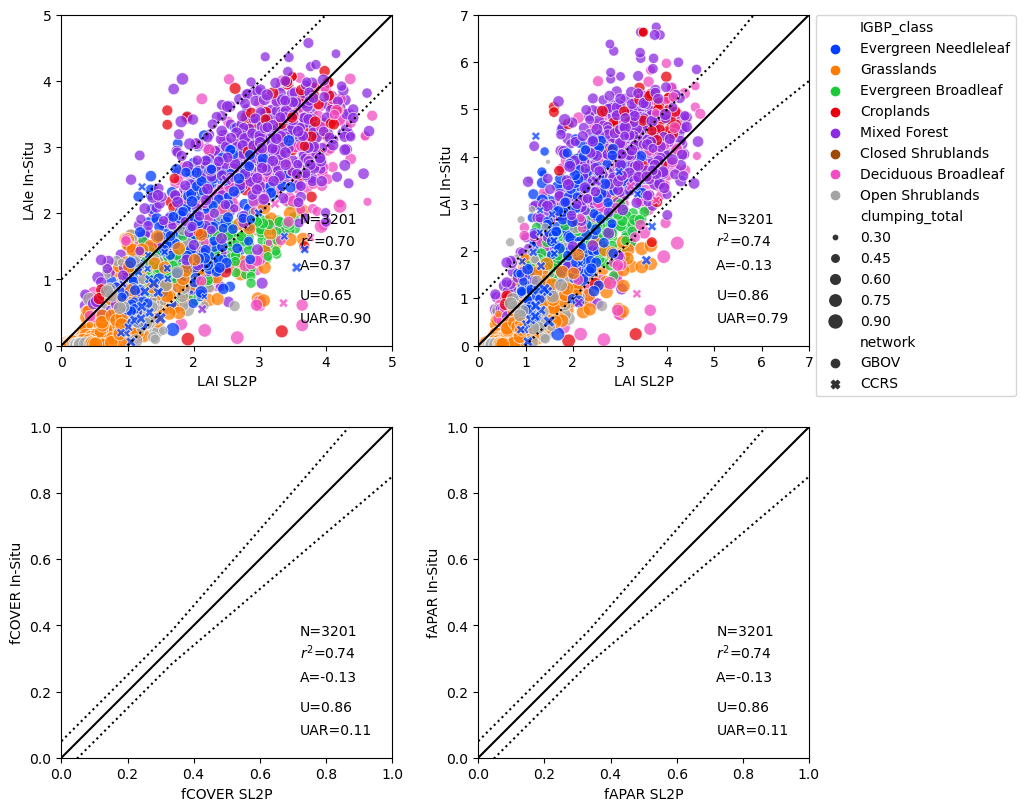

In [21]:
# figure 7
fig, ax = plt.subplots(2,2,constrained_layout = True)
fig.set_size_inches(10 ,8)
data = samplesList[4]

y = data['LAIe_total']
yerror = data['LAIe_total_err']
x = data['LAI_PAIe_total_estimate']
xerror = data['LAI_PAIe_total_err_estimate_mean'].astype('float')
# ax[0,0].errorbar(x, y,yerr=yerror,xerr=xerror,ls='none', fmt = 'or', ms=0, ecolor='grey',alpha=0.15)
sns.scatterplot(data=data, x='LAI_PAIe_total_estimate', y='LAIe_total', hue='IGBP_class', style='network', size = 'clumping_total',  sizes=(10, 100), alpha=0.75,palette="bright", ax=ax[0,0],legend=False)
ax[0,0].plot(np.linspace(0,6,100),np.linspace(0,6,100)+np.maximum(np.linspace(0,6,100)*0.20,1),color='black',linestyle='dotted')
ax[0,0].plot(np.linspace(0,6,100),np.linspace(0,6,100)+np.minimum(-np.linspace(0,6,100)*0.20,-1),color='black',linestyle='dotted')
ax[0,0].plot([0,6],[0,6],color='black')
ax[0,0].set(adjustable='box',aspect='equal')
ax[0,0].set_ylabel('LAIe In-Situ')
ax[0,0].set_xlabel('LAI SL2P')
n = len(x)
res = np.array(x.sub(y))
unc= np.mean(res ** 2) ** (0.5)
acc = np.mean(res)
uar = np.mean(np.abs(res)<np.maximum(1,0.2*x))
r2 = 1 - unc ** 2 / np.var(np.array(y))
ax[0,0].annotate(f'N={n}', xy=(0.72, 0.37), xycoords='axes fraction')
ax[0,0].annotate(f'$r^2$={r2:.2f}', xy=(0.72, 0.30), xycoords='axes fraction')
ax[0,0].annotate(f'A={acc:.2f}', xy=(0.72, 0.23), xycoords='axes fraction')
ax[0,0].annotate(f'U={unc:.2f}', xy=(0.72, 0.14), xycoords='axes fraction')
ax[0,0].annotate(f'UAR={uar:.2f}', xy=(0.72, 0.07), xycoords='axes fraction')

print(np.unique(data['IGBP_class']))
y = data['LAI_total']
yerror = data['LAI_total_err']
x = data['LAI_PAIe_total_estimate']
xerror = data['LAI_PAIe_total_err_estimate_mean'].astype('float')
# ax[0,1].errorbar(x, y,yerr=yerror,xerr=xerror,ls='none', fmt = 'or', ms=0, ecolor='grey',alpha=0.15)
sns.scatterplot(data=data, x='LAI_PAIe_total_estimate', y='LAI_total', hue='IGBP_class', style='network', size = 'clumping_total',  sizes=(10, 100), alpha=.75, palette="bright", ax=ax[0,1])
ax[0,1].plot(np.linspace(0,7,100),np.linspace(0,7,100)+np.maximum(np.linspace(0,7,100)*0.20,1),color='black',linestyle='dotted')
ax[0,1].plot(np.linspace(0,7,100),np.linspace(0,7,100)+np.minimum(-np.linspace(0,7,100)*0.20,-1),color='black',linestyle='dotted')
ax[0,1].plot([0,7],[0,7],color='black')
ax[0,1].set(adjustable='box',aspect='equal')
ax[0,1].set_ylabel('LAI In-Situ')
ax[0,1].set_xlabel('LAI SL2P')
n = len(x)
res = np.array(x.sub(y))
unc= np.mean(res ** 2) ** (0.5)
acc = np.mean(res)
uar = np.mean(np.abs(res)<np.maximum(1,0.2*x))
r2 = 1 - unc ** 2 / np.var(np.array(y))
ax[0,1].annotate(f'N={n}', xy=(0.72, 0.37), xycoords='axes fraction')
ax[0,1].annotate(f'$r^2$={r2:.2f}', xy=(0.72, 0.30), xycoords='axes fraction')
ax[0,1].annotate(f'A={acc:.2f}', xy=(0.72, 0.23), xycoords='axes fraction')
ax[0,1].annotate(f'U={unc:.2f}', xy=(0.72, 0.14), xycoords='axes fraction')
ax[0,1].annotate(f'UAR={uar:.2f}', xy=(0.72, 0.07), xycoords='axes fraction')

#y = data['fCOVER_total']
#yerror = data['fCOVER_total_err']
#x = data['fCOVER_fCOVER_total_estimate']
#xerror = data['fCOVER_fCOVER_total_err_estimate_mean'].astype('float')
# ax[1,0].errorbar(x, y,yerr=yerror,xerr=xerror,ls='none', fmt = 'or', ms=0, ecolor='grey',alpha=0.15)
ax[0,1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#sns.scatterplot(data=data, x='fCOVER_fCOVER_total_estimate', y='fCOVER_total', hue='IGBP_class', style='network', size = 'clumping_total',  sizes=(10, 100), alpha=.75, palette="bright", ax=ax[1,0],legend=False)
ax[1,0].plot(np.linspace(0,1,100),np.linspace(0,1,100)+np.maximum(np.linspace(0,1,100)*0.15,0.05),color='black',linestyle='dotted')
ax[1,0].plot(np.linspace(0,1,100),np.linspace(0,1,100)+np.minimum(-np.linspace(0,1,100)*0.15,-0.05),color='black',linestyle='dotted')
ax[1,0].plot([0,1],[0,1],color='black')
ax[1,0].set(adjustable='box',aspect='equal')
ax[1,0].set_ylabel('fCOVER In-Situ')
ax[1,0].set_xlabel('fCOVER SL2P')
n = len(x)
res = np.array(x.sub(y))
unc= np.mean(res ** 2) ** (0.5)
acc = np.mean(res)
uar = np.mean(np.abs(res)<np.maximum(0.05,0.10*x))
r2 = 1 - unc ** 2 / np.var(np.array(y))
ax[1,0].annotate(f'N={n}', xy=(0.72, 0.37), xycoords='axes fraction')
ax[1,0].annotate(f'$r^2$={r2:.2f}', xy=(0.72, 0.30), xycoords='axes fraction')
ax[1,0].annotate(f'A={acc:.2f}', xy=(0.72, 0.23), xycoords='axes fraction')
ax[1,0].annotate(f'U={unc:.2f}', xy=(0.72, 0.14), xycoords='axes fraction')
ax[1,0].annotate(f'UAR={uar:.2f}', xy=(0.72, 0.07), xycoords='axes fraction')

#y = data['fAPAR_total']
#yerror = data['fAPAR_total_err']
#x = data['fAPAR_fAPAR_total_estimate']
#xerror = data['fAPAR_fAPAR_total_err_estimate_mean'].astype('float')
# ax[1,1].errorbar(x, y,yerr=yerror,xerr=xerror,ls='none', fmt = 'or', ms=0, ecolor='grey',alpha=0.15)
#sns.scatterplot(data=data, x='fAPAR_fAPAR_total_estimate', y='fAPAR_total', hue='IGBP_class', style='network', size = 'clumping_total',  sizes=(10, 100), alpha=.75, palette="bright", ax=ax[1,1],legend=False)
ax[1,1].plot(np.linspace(0,1,100),np.linspace(0,1,100)+np.maximum(np.linspace(0,1,100)*0.15,0.05),color='black',linestyle='dotted')
ax[1,1].plot(np.linspace(0,1,100),np.linspace(0,1,100)+np.minimum(-np.linspace(0,1,100)*0.15,-0.05),color='black',linestyle='dotted')
ax[1,1].plot([0,1],[0,1],color='black')
ax[1,1].set(adjustable='box',aspect='equal')
ax[1,1].set_ylabel('fAPAR In-Situ')
ax[1,1].set_xlabel('fAPAR SL2P')
n = len(x)
res = np.array(x.sub(y))
unc= np.mean(res ** 2) ** (0.5)
acc = np.mean(res)
uar = np.mean(np.abs(res)<np.maximum(0.05,0.10*x))
r2 = 1 - unc ** 2 / np.var(np.array(y))
ax[1,1].annotate(f'N={n}', xy=(0.72, 0.37), xycoords='axes fraction')
ax[1,1].annotate(f'$r^2$={r2:.2f}', xy=(0.72, 0.30), xycoords='axes fraction')
ax[1,1].annotate(f'A={acc:.2f}', xy=(0.72, 0.23), xycoords='axes fraction')
ax[1,1].annotate(f'U={unc:.2f}', xy=(0.72, 0.14), xycoords='axes fraction')
ax[1,1].annotate(f'UAR={uar:.2f}', xy=(0.72, 0.07), xycoords='axes fraction')

ax[0,0].set_xlim([0,5])
ax[0,1].set_xlim([0,7])
ax[1,0].set_xlim([0,1])
ax[1,1].set_xlim([0,1])
ax[0,0].set_ylim([0,5])
ax[0,1].set_ylim([0,7])
ax[1,0].set_ylim([0,1])
ax[1,1].set_ylim([0,1])
plt.savefig(os.path.join(datapath,'Figure7Brown.png'),bbox_inches='tight')
plt.show()
